In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from VarSVM import noneg_driftsvm

In [3]:
f_data=pd.read_csv('dataset.csv')
f_data.head()

,Batting Innings,Batting Position,Runs Scored,Balls Faced,Batting Strikerate,Out/NotOut,4s,6s,50s,100s,...,5 wicket hauls,Wickets in Powerplay,Wickets in Middle Overs,Wickets in Death Overs,Economy in Powerplay,Economy in Middle Overs,Economy in Death Overs,Catches or Runouts as Fielder,Match Result,Man of the match
0,1.0,0.0,10.0,12.0,83.33,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,-1.0,-1.0,5.52,0.0,1.0,0.0
1,2.0,8.0,14.0,30.0,46.67,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.00,1.0,0.0,0.0
2,1.0,0.0,12.0,19.0,63.16,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.00,0.0,0.0,0.0
3,1.0,0.0,4.0,2.0,200.00,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,7.00,0.0,0.0,0.0
4,2.0,2.0,51.0,39.0,130.77,1.0,4.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,14.00,0.0,0.0,0.0


In [4]:
f_data['Balls Bowled'].mean()

11.017553990068137

In [5]:
f_data.columns


Index(['Batting Innings', 'Batting Position', 'Runs Scored', 'Balls Faced',
       'Batting Strikerate', 'Out/NotOut', '4s', '6s', '50s', '100s',
       'Runs in Powerplay', 'Runs in Middle Overs', 'Runs in Death Overs',
       'Strikerate in first 20 balls', 'Strikerate in 20 to 30 balls',
       'Strikerate after 30 balls', 'Bowling Innings', 'Runs Given',
       'Balls Bowled', 'Wickets Taken', 'Economy Rate', 'Bowling Strikerate',
       '3 wicket hauls', '5 wicket hauls', 'Wickets in Powerplay',
       'Wickets in Middle Overs', 'Wickets in Death Overs',
       'Economy in Powerplay', 'Economy in Middle Overs',
       'Economy in Death Overs', 'Catches or Runouts as Fielder',
       'Match Result', 'Man of the match'],
      dtype='object')

In [6]:
t_data=f_data.loc[(f_data['Balls Bowled']<6) & (f_data['Balls Faced']>10)]

In [77]:
data=t_data[['Runs Scored', 'Batting Strikerate', '4s', '6s','Runs in Powerplay', 'Runs in Middle Overs', 'Runs in Death Overs',
       'Strikerate in first 20 balls', 'Strikerate in 20 to 30 balls',
       'Strikerate after 30 balls','Match Result', 'Man of the match']]

In [78]:
data.head()

,Runs Scored,Batting Strikerate,4s,6s,Runs in Powerplay,Runs in Middle Overs,Runs in Death Overs,Strikerate in first 20 balls,Strikerate in 20 to 30 balls,Strikerate after 30 balls,Match Result,Man of the match
1,14.0,46.67,1.0,0.0,4.0,10.0,0.0,23.33,70.0,-1.00,0.0,0.0
2,12.0,63.16,1.0,0.0,9.0,3.0,0.0,60.00,-1.0,-1.00,0.0,0.0
9,15.0,75.00,2.0,0.0,1.0,14.0,0.0,75.00,-1.0,-1.00,0.0,0.0
12,86.0,162.26,6.0,6.0,20.0,25.0,41.0,43.40,30.3,230.43,1.0,0.0
20,44.0,97.78,1.0,2.0,16.0,28.0,0.0,53.33,24.0,93.33,0.0,0.0


In [79]:
for col in data.columns:
    for i in data.index:
        if data[col][i]<0:
            data[col][i]=0;

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


- First we attempt to create a linear model where the X is a feature vector and the y is the man of the match. 
- We consider all features which when increases increases the chance of being a better player. 
- So now we learn a linear classification model where the weights are constrained to be non negative so that the weights kind of give the fraction of contribution towards deciding the player as a star performer. This is because we cant say a player was a star based on one statistic so we try to gauge which feature kind of contributes more
- We first attempt to use a SVM rather than sigmoid based model. So we will centre the data btwn [-0.5,0.5]



In [80]:
for col in data.columns:
    
    maxer=data[col].max()
    miner=data[col].min()
    data[col]=(data[col]-miner)/(maxer-miner)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [81]:
for col in data.columns:
    if col=='Man of the match':
        data[col]=data[col]*2-1
        break
    data[col]-=0.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
X_data=data.drop(['Man of the match'],axis=1).to_numpy()
y_data=data['Man of the match'].to_numpy()

In [83]:
func=np.ascontiguousarray

In [84]:
clf=noneg_driftsvm()
clf.fit(X=func(X_data),y=func(y_data))
y_pred=clf.predict(X=X_data)

[0.57847119 0.18011205 0.0692805  0.01158867 0.         0.01811325
 0.01395115 0.         0.         0.00512772 0.12335548]


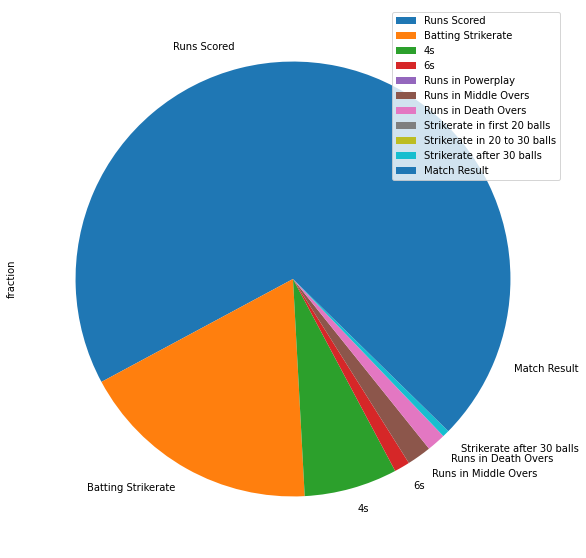

In [86]:
weights=clf.beta
weights=weights/np.sum(weights)
print(weights)
df=pd.DataFrame({'fraction':weights},index=data.columns[:-1])
plot=df.plot.pie(y='fraction',figsize=(10,10))